In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import collections
import sklearn
import pickle
from sklearn.base import BaseEstimator, ClassifierMixin

# Подготовка датасета

In [ ]:
data = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Убираем ненужные данные

In [ ]:
data = data.drop (["PassengerId", "Name", "Ticket"], axis = 1)

Вытаскиваем ответы

In [ ]:
label = data ["Survived"]
data = data.drop (["Survived"], axis = 1)

Проверяем, есть ли незаполненные данные или данные с неподходящим типом

In [ ]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Дозаполняем данные о возрасте

In [ ]:
data ["Age"] = data ["Age"].fillna (data ["Age"].median ())

Смотрим на самые частовстречающиеся значения столбца "Embarked".

In [ ]:
data ["Embarked"].value_counts ()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Это "S". Заполняем пропуски этим значением.

In [ ]:
data ["Embarked"] = data ["Embarked"].fillna ("S")

Стобец "Cabin" состоит из уникальных данных. Кроме того, большая часть данных отсутствует. Пытаться заполнить его не имеет смысла, поэтому просто удаляем.

In [ ]:
data ["Cabin"].value_counts ()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
data = data.drop (["Cabin"], axis = 1)

Бинаризируем графы "Sex" и "Embarked".

In [ ]:
data ["Sex"] = data ["Sex"].astype ("category")
data ["Sex"] = data ["Sex"].cat.codes

In [ ]:
data = pd.get_dummies (data, columns = ["Embarked"])

In [ ]:
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,3,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1
4,3,1,35.0,0,0,8.0500,0,0,1
5,3,1,28.0,0,0,8.4583,0,1,0
6,1,1,54.0,0,0,51.8625,0,0,1
7,3,1,2.0,3,1,21.0750,0,0,1
8,3,0,27.0,0,2,11.1333,0,0,1
9,2,0,14.0,1,0,30.0708,1,0,0


In [ ]:
data.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Pclass,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
Sex,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224
Age,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729
SibSp,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
Parch,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
Fare,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
Embarked_C,-0.243292,-0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
Embarked_Q,0.221009,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
Embarked_S,0.074053,0.119224,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000


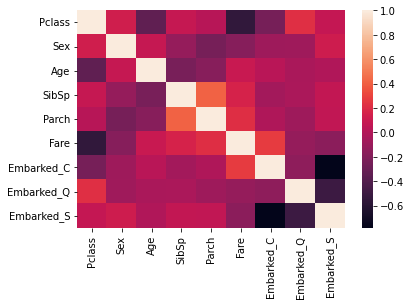

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


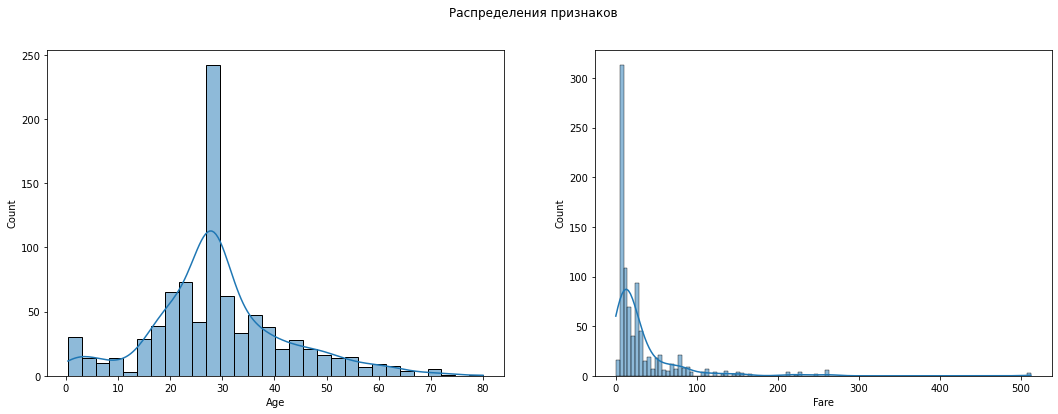

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
fig.suptitle('Распределения признаков')
sns.histplot(data['Age'], ax = ax[0], kde = True)
sns.histplot(data['Fare'], ax = ax[1], kde = True)
None